# Homework 2: Introduction to SVMs

------------------------------------------------------
*Machine Learning, Master in Big Data Analytics, 2017-2018*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------

### Student 1: Niall O'Neill 

### Sudent 2: Karolina Sidlauskaite

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# use seaborn plotting defaults
import seaborn as sns; sns.set()

## A synthetic dataset

In the first part of this homework, you will work with the following dataset

In [2]:
data=np.load('DataSet1.npz') 

X_train=data['arr_0']
Y_train=data['arr_1']
X_test=data['arr_2']


Let's plot it to have an idea about how it looks:

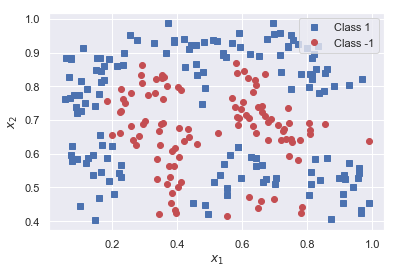

In [3]:
min1=np.min(X_train[:,0])
max1=np.max(X_train[:,0])
min2=np.min(X_train[:,1])
max2=np.max(X_train[:,1])



## Plot Data
index=(Y_train==1).reshape(Y_train.shape[0],)
plt.plot(X_train[index,0],X_train[index,1],'s',label="Class 1")
index=(Y_train==0).reshape(Y_train.shape[0],)
plt.plot(X_train[index,0],X_train[index,1],'ro',label="Class -1")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.rcParams["figure.figsize"] = [8,8]

** Question 1 (1 point)** Hold out part of the training data to create a validation set. For instance, take the 20% of the data points at random for validation.

In [3]:
import KLR_library as KLR
np.random.seed(0)
X_train,X_validation, Y_train,Y_validation = KLR.split_set(X_train, Y_train , 0.8)

print(X_train.shape, Y_train.shape)
print(X_validation.shape, Y_validation.shape)

(200, 2) (200, 1)
(49, 2) (49, 1)


** Question 2 (2 points)** Train a SVM with a linear kernel. Plot the decision boundary and the $\pm 1$-distance to boundary contour levels. 

Use different values of $C$ and analyze the evolution of the number of support vectors as you vary this quantity. Explain the results!

Compute and plot the classification error rate for both training and validation sets as a function of $C$.

Do you think a linear kernel is adequate in this case?

In [13]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:            #If no figure handle is provided, it opens the current figure
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)    #30 points in the grid axis
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)                 # We create a grid with the x,y coordinates defined above
    
    # From the grid to a list of (x,y) values. 
    # Check Numpy help for ravel()
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T 
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    # In levels we provide a list of floating point numbers indicating 
    #the level curves to draw, in increasing order; e.g., to draw just the zero contour pass
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, marker='p')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [6]:
def get_coordinates(i):
    
    switcher = {
        0: [0,0],
        1: [0,1],
        2: [0,2],
        3: [1,0],
        4: [1,1],
        5: [1,2]
    }
    return switcher.get(i)

C =  10
Support vectors: 160
C =  100
Support vectors: 165
C =  1000
Support vectors: 164
C =  10000.0
Support vectors: 159
C =  1000000.0
Support vectors: 160
C =  10000000000.0
Support vectors: 127


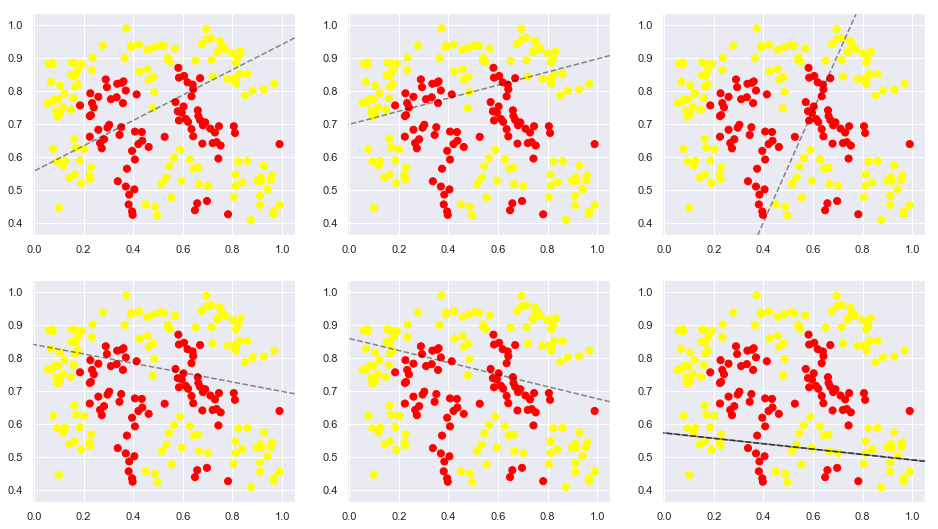

In [8]:
from sklearn.svm import SVC
from sklearn import metrics

f, axes = plt.subplots(2, 3)
plt.rcParams["figure.figsize"] = [16,9]

C_vals = [10, 100, 1000, 1E4, 1E6, 1E10]
train_acc = []
valid_acc = []
i = 0

for c1 in C_vals:
    model = SVC(kernel='linear', C=c1)   
    model.fit(X_train, Y_train.ravel())
    
    train_acc.append(model.score(X_train,Y_train))
    valid_acc.append(model.score(X_validation, Y_validation))
    
    coords = get_coordinates(i)
    
    axes[coords[0], coords[1]].scatter(X_train[:, 0], X_train[:, 1], c=Y_train.ravel(), s=50, cmap='autumn')
    plot_svc_decision_function(model, ax=axes[coords[0], coords[1]], plot_support=False)   
    print("C = ", c1)
    print("Support vectors:", len(model.support_)) 
    i += 1

It appears that the number of support vectors is decreasing with the increasing value of C, which measures the degree to which the margin constraints are violated. Training patterns is said to be violating the margin constraint if the kernel expansion has a value between -1 and 1, and so all patterns violating this constraing are the support vectors. With the C increasing, the penalty put on the violation of the constraing is increasing too, so the solution is changing to reduce the size of the violations by making the margin narrower, and so getting less support vectors. From the plots above we can see that the margin is extremely small and so it appears that a linear kernel is not adequate for this particular case. This is clear even by looking at the data points and how they are located in the plot, there is no way a linear kernel can be defined to accurately separate the two groups.

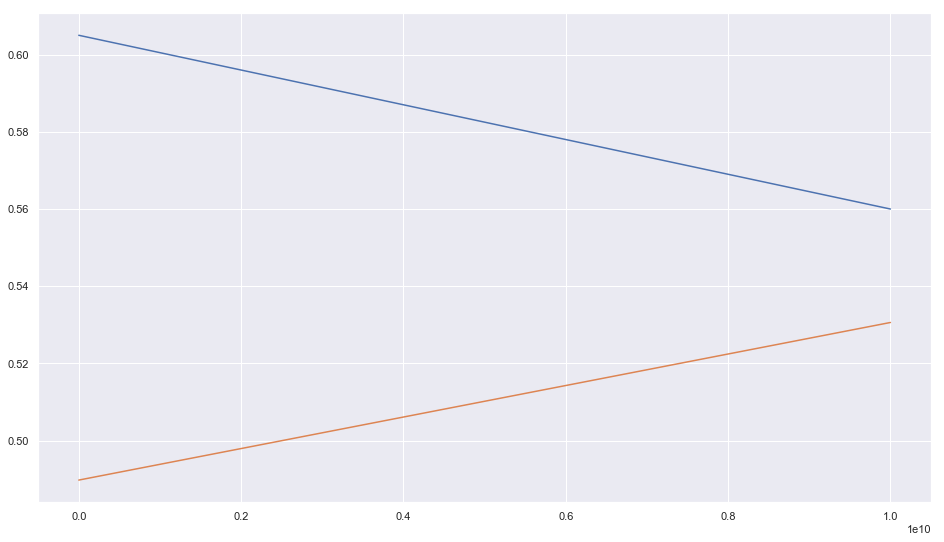

In [9]:
plt.plot(C_vals,train_acc)
plt.plot(C_vals,valid_acc)

** Question 3 (2 points)** Train a SVM with a RBF kernel with bandwith $\gamma$. Plot the decision boundary and the $\pm 1$-distance to boundary contour levels. 

Use different values of $(C,\gamma)$ and analyze the evolution of the number of support vectors as you vary these quantities. For instance, fix $\gamma=1$ and vary $C$ and the other way around. Explain the results! Plotting the decision boundary and support vectors will help you to understand what's going on.

Note: check [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) to see how to vary $\gamma$.

For different values of $\gamma$, compute and plot the classification error rate for both training and validation sets as a function of $C$.


#### First we try fixing gamma to 1 and varying C values:

C =  10
Support vectors: 123
C =  100
Support vectors: 97
C =  1000
Support vectors: 84
C =  10000.0
Support vectors: 71
C =  1000000.0
Support vectors: 43
C =  10000000000.0
Support vectors: 22


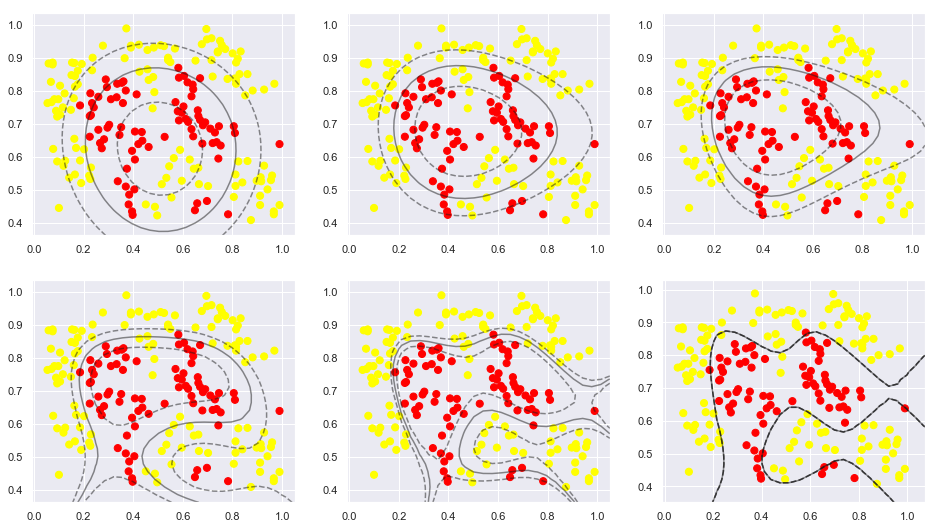

In [10]:
f, axes = plt.subplots(2,3)
plt.rcParams["figure.figsize"] = [16,9]

C_vals = [10, 100, 1000, 1E4, 1E6, 1E10]

i = 0

for c1 in C_vals:
    model = SVC(kernel='rbf', C=c1, gamma=1)
    model.fit(X_train, Y_train.ravel())

    coords = get_coordinates(i)
    
    axes[coords[0], coords[1]].scatter(X_train[:, 0], X_train[:, 1], c=Y_train.ravel(), s=50, cmap='autumn')
    plot_svc_decision_function(model, ax=axes[coords[0], coords[1]], plot_support=False)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    
    print("C = ", c1)
    print("Support vectors:", len(model.support_))
    i += 1

This is already obviously a better choice for separating the two groups by using the kernel SVM. The decision boundary is changing with the increasing C, which increased to 1E10 narrows the margin to the minimum almost overfitting the data. We can also see that the number of support vectors decreases quite a lot by increasing the number of C.

#### Then we try fixing C and varying gamma:

Gamma =  1
Support vectors: 123
Gamma =  2
Support vectors: 106
Gamma =  5
Support vectors: 93
Gamma =  10
Support vectors: 72
Gamma =  auto
Support vectors: 146
Gamma =  scale
Support vectors: 105


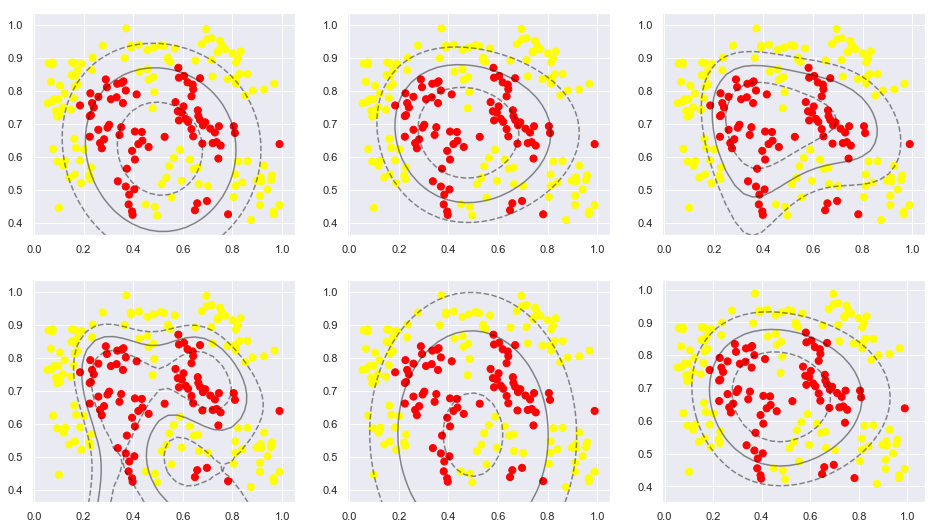

In [11]:
f, axes = plt.subplots(2,3)
plt.rcParams["figure.figsize"] = [16,9]

G_vals = [1, 2, 5, 10, 'auto', 'scale']

i = 0

for g1 in G_vals:
    model = SVC(kernel='rbf', C=10, gamma=g1)
    model.fit(X_train, Y_train.ravel())

    coords = get_coordinates(i)
    
    axes[coords[0], coords[1]].scatter(X_train[:, 0], X_train[:, 1], c=Y_train.ravel(), s=50, cmap='autumn')
    plot_svc_decision_function(model, ax=axes[coords[0], coords[1]], plot_support=False)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    
    print("Gamma = ", g1)
    print("Support vectors:", len(model.support_))
    i += 1

Changing the value of $\gamma$ of the kernel we can see a similar behaviour which changes the decision boundary to better fit the data

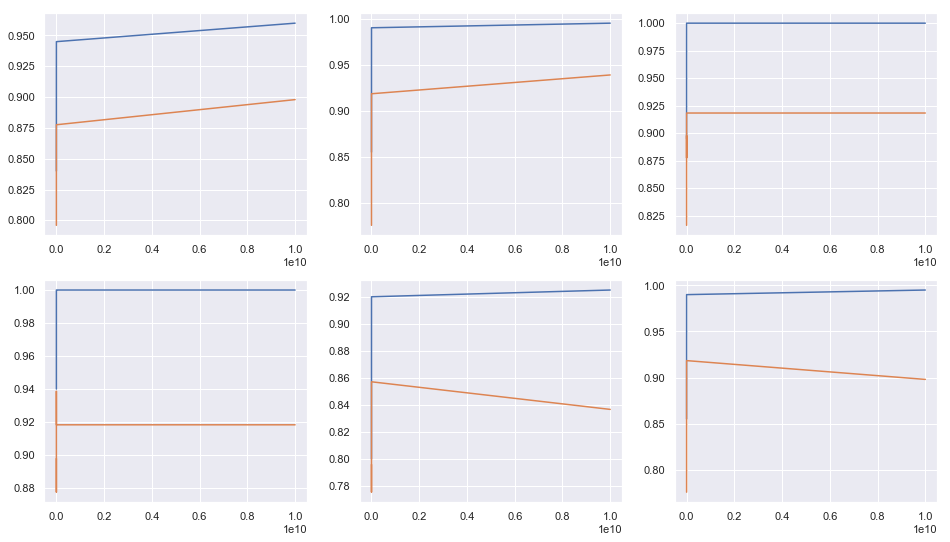

In [12]:
f, axes = plt.subplots(2, 3)
plt.rcParams["figure.figsize"] = [16,9]

i=0

for j in G_vals:
    train_acc_rbf = []
    valid_acc_rbf = []
    for k in C_vals: 
        model = SVC(kernel='rbf', C=k, gamma=j)
        model.fit(X_train, Y_train.ravel())
        
        coords = get_coordinates(i)
        
        train_acc_rbf.append(model.score(X_train,Y_train))
        valid_acc_rbf.append(model.score(X_validation, Y_validation))
        
    axes[coords[0], coords[1]].plot(C_vals,train_acc_rbf)
    axes[coords[0], coords[1]].plot(C_vals,valid_acc_rbf)

    i+=1

## A real dataset: Breast Cancer Diagnostic Data Set


The [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) contains 10 features related to breast tumors that have been diagnosed as benign or malignant. You have a description of the 10 features in the link above. In the same link you can download the data set as a CVS file.

** Question 4 (1 point)** Hold out part of the training data to create a **test set**. For instance, take the 20% of the data points at random to create the test set.

Also, normalize the data so every feature has zero mean and unit variance. Be aware that both validation and test data must be normalized using the training mean & variance for every feature.

In [11]:
import pandas as pd
from sklearn import preprocessing

cancer_data=pd.read_csv('breast-cancer-wisconsin.data', delimiter=",", header=None, na_values=["?"])
cancer_data.fillna(cancer_data.mean(), inplace=True)
cancer_data = cancer_data.values

np.random.seed(0)

X_train=cancer_data[:,1:10]
Y_train=cancer_data[:,-1]

X_train, X_test, Y_train, y_test =  KLR.split_set(X_train, Y_train , 0.8)

print(X_train.shape, Y_train.shape)
print(X_test.shape, y_test.shape)

#X_train, mu_train, std_train = KLR.normalize(X_train)
#X_test, mu_test, std_test = KLR.normalize(X_test, mu_train, std_train)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(559, 9) (559,)
(139, 9) (139,)


** Question 5 (4 points)**

Using the test set, compare the classification error for different SVM models in which free parameters ($C$ and kernel parameters) are chosen using [5-fold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). 

In [12]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svc = SVC()
kf = KFold(n_splits=5)

C_vals = [1, 10, 100]
G_vals = [1, 2, 5, 'auto', 'scale']

params = { 'kernel' : ('linear', 'rbf'), 'C' : C_vals, 'gamma' : G_vals}

clf = GridSearchCV(estimator=svc, param_grid=params, cv = kf, verbose=0)
clf.fit(X_train, Y_train)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

print()
print("Best parameters: ", clf.best_params_)

y_true, y_pred = y_test, clf.predict(X_test)

print()
print("Classification report for the best model:")
print()
print(classification_report(y_true, y_pred))

0.962 (+/-0.036) for {'C': 1, 'gamma': 1, 'kernel': 'linear'}
0.941 (+/-0.033) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.962 (+/-0.036) for {'C': 1, 'gamma': 2, 'kernel': 'linear'}
0.937 (+/-0.039) for {'C': 1, 'gamma': 2, 'kernel': 'rbf'}
0.962 (+/-0.036) for {'C': 1, 'gamma': 5, 'kernel': 'linear'}
0.894 (+/-0.052) for {'C': 1, 'gamma': 5, 'kernel': 'rbf'}
0.962 (+/-0.036) for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.962 (+/-0.050) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.962 (+/-0.036) for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.962 (+/-0.050) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.961 (+/-0.033) for {'C': 10, 'gamma': 1, 'kernel': 'linear'}
0.946 (+/-0.039) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.961 (+/-0.033) for {'C': 10, 'gamma': 2, 'kernel': 'linear'}
0.941 (+/-0.033) for {'C': 10, 'gamma': 2, 'kernel': 'rbf'}
0.961 (+/-0.033) for {'C': 10, 'gamma': 5, 'kernel': 'linear'}
0.907 (+/-0.051) for {'C': 10, 'gamma': 5, 'kernel': 'rbf'}
0.96